Import necessary library.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MultiLabelBinarizer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('ai_job_dataset.csv')
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
unique_counts = data.nunique()
print(f"unique_counts:\n{unique_counts}")

unique_counts:
job_id                    15000
job_title                    20
salary_usd                14315
salary_currency               3
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           20
remote_ratio                  3
required_skills           13663
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64


In [5]:
nan_counts = data.isna().sum()
print(f"nan_counts:\n{nan_counts}")

nan_counts:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


Get the scaled price.

In [6]:
map_currency = {"USD" : 1,
              "EUR" : 1.17,
              "GBP"  : 1.37}
data["True_salary"] = data["salary_usd"] * data["salary_currency"].map(map_currency).astype(int)
data

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,True_salary
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,90376
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,61895
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,152626
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,80215
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,54624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics,38604
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics,57811
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations,189490
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics,79461


<Axes: xlabel='True_salary', ylabel='company_name'>

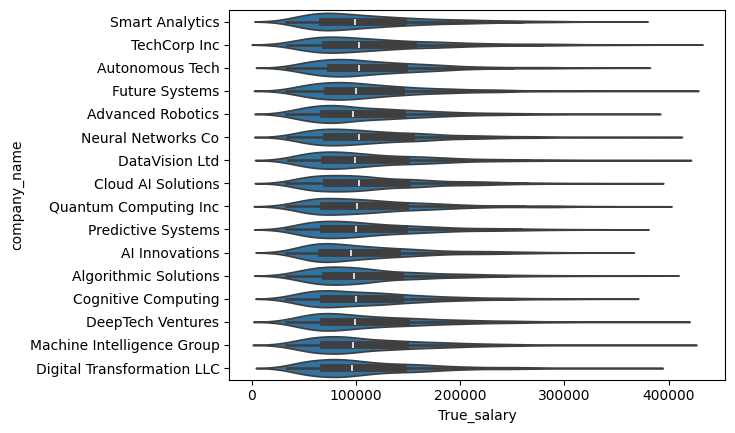

In [7]:
sns.violinplot(data=data , x=data["True_salary"], y=data["company_name"])

<Axes: xlabel='years_experience', ylabel='True_salary'>

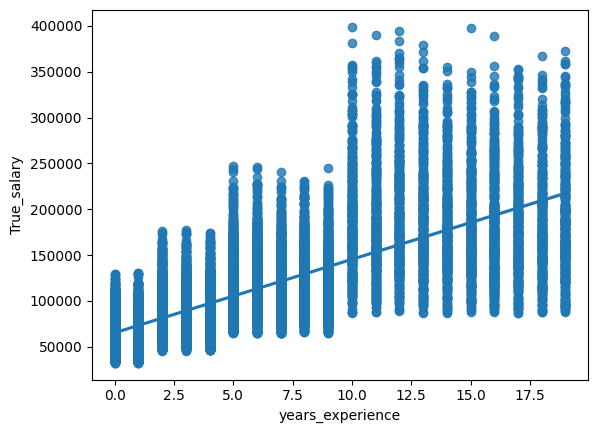

In [8]:
sns.regplot(data=data , x="years_experience", y="True_salary")

<Axes: xlabel='benefits_score', ylabel='True_salary'>

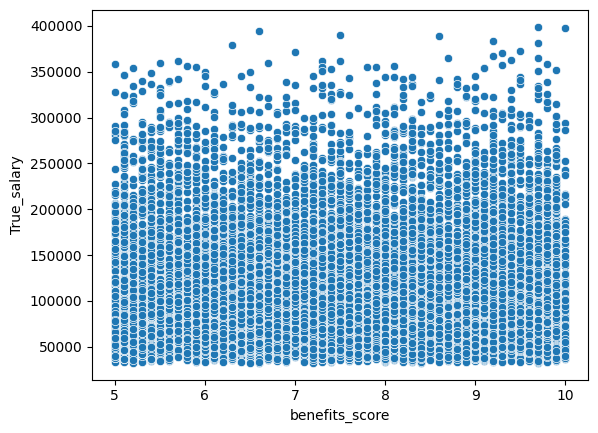

In [9]:
sns.scatterplot(data=data , x="benefits_score", y="True_salary")

<Axes: xlabel='education_required', ylabel='True_salary'>

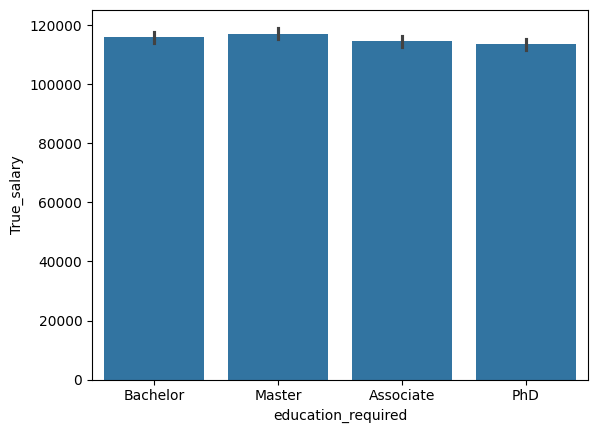

In [10]:
sns.barplot(data=data , x="education_required", y="True_salary")

<Axes: xlabel='years_experience', ylabel='True_salary'>

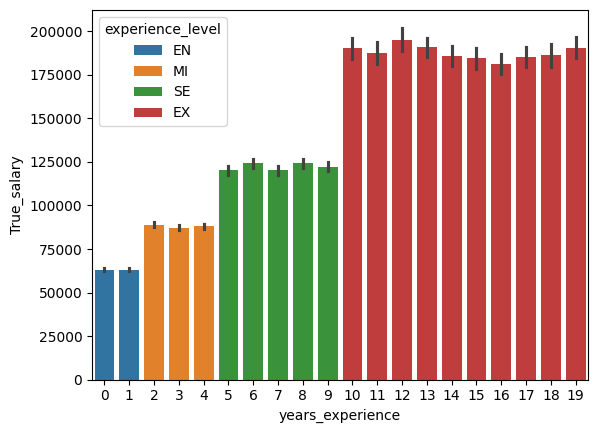

In [11]:
sns.barplot(data=data, x='years_experience', y='True_salary', hue='experience_level')

In [12]:
data['application_deadline']=pd.to_datetime(data['application_deadline'])
data['posting_date'] = pd.to_datetime(data['posting_date'])

data['Days_to_apply']= (data['application_deadline'] - data['posting_date']).dt.days
data.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,...,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,True_salary,Days_to_apply
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,90376,20
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,61895,52
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,152626,20
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,80215,63
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,54624,69


In [13]:
le=LabelEncoder()
data['job_title']=le.fit_transform(data['job_title'])
data['company_location']=le.fit_transform(data['company_location'])
data['industry']=le.fit_transform(data['industry'])
data['company_name']=le.fit_transform(data['company_name'])
data['salary_currency']=le.fit_transform(data['salary_currency'])
data['employee_residence']=le.fit_transform(data['employee_residence'])

dummis=pd.get_dummies(data[['experience_level','company_size','employment_type','experience_level']],drop_first=True)
data=pd.concat([data,dummis],axis=1)
data=data.drop(["posting_date" , "application_deadline",'job_id','job_description_length','experience_level','employment_type', 'company_size','education_required'],axis=1)

data

,job_title,salary_usd,salary_currency,company_location,employee_residence,remote_ratio,required_skills,years_experience,industry,benefits_score,...,experience_level_MI,experience_level_SE,company_size_M,company_size_S,employment_type_FL,employment_type_FT,employment_type_PT,experience_level_EX,experience_level_MI,experience_level_SE
0,3,90376,2,3,3,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",9,0,5.9,...,False,True,True,False,False,False,False,False,False,True
1,4,61895,2,2,9,100,"Deep Learning, AWS, Mathematics, Python, Docker",1,9,5.2,...,False,False,True,False,False,False,False,False,False,False
2,5,152626,2,17,15,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",2,2,9.4,...,True,False,False,False,True,False,False,False,True,False
3,16,80215,2,8,8,50,"Scala, SQL, Linux, Python",7,1,8.6,...,False,True,True,False,True,False,False,False,False,True
4,1,54624,0,6,14,100,"MLOps, Java, Tableau, Python",0,9,6.6,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,19,38604,2,5,5,50,"Java, Kubernetes, Azure",1,3,7.9,...,False,False,False,True,True,False,False,False,False,False
14996,15,57811,1,18,18,0,"Mathematics, Docker, SQL, Deep Learning",0,6,8.2,...,False,False,True,False,False,False,False,False,False,False
14997,16,189490,2,15,15,50,"Scala, Spark, NLP",17,8,7.4,...,False,False,False,False,False,False,False,True,False,False
14998,12,79461,0,12,12,0,"Java, Computer Vision, Python, TensorFlow",1,10,5.6,...,False,False,True,False,False,True,False,False,False,False


In [14]:
data['required_skills'] = data['required_skills'].str.split(',\s*')  # split and remove whitespace
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(data['required_skills'])
skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)
data = pd.concat([data.drop(columns='required_skills'), skills_df], axis=1)
data.info()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            15000 non-null  int64  
 1   salary_usd           15000 non-null  int64  
 2   salary_currency      15000 non-null  int64  
 3   company_location     15000 non-null  int64  
 4   employee_residence   15000 non-null  int64  
 5   remote_ratio         15000 non-null  int64  
 6   years_experience     15000 non-null  int64  
 7   industry             15000 non-null  int64  
 8   benefits_score       15000 non-null  float64
 9   company_name         15000 non-null  int64  
 10  True_salary          15000 non-null  int64  
 11  Days_to_apply        15000 non-null  int64  
 12  experience_level_EX  15000 non-null  bool   
 13  experience_level_MI  15000 non-null  bool   
 14  experience_level_SE  15000 non-null  bool   
 15  company_size_M       15000 non-null 

C:\Users\PcKala.org\AppData\Local\Temp\ipykernel_7780\3176339908.py:1: SyntaxWarning: invalid escape sequence '\s'
  data['required_skills'] = data['required_skills'].str.split(',\s*')  # split and remove whitespace


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_title            15000 non-null  int64  
 1   salary_usd           15000 non-null  int64  
 2   salary_currency      15000 non-null  int64  
 3   company_location     15000 non-null  int64  
 4   employee_residence   15000 non-null  int64  
 5   remote_ratio         15000 non-null  int64  
 6   years_experience     15000 non-null  int64  
 7   industry             15000 non-null  int64  
 8   benefits_score       15000 non-null  float64
 9   company_name         15000 non-null  int64  
 10  True_salary          15000 non-null  int64  
 11  Days_to_apply        15000 non-null  int64  
 12  experience_level_EX  15000 non-null  bool   
 13  experience_level_MI  15000 non-null  bool   
 14  experience_level_SE  15000 non-null  bool   
 15  company_size_M       15000 non-null 

In [ ]:
train=data.drop('True_salary',axis=1)
test=data['True_salary']
x_train,x_test,y_train,y_test=train_test_split(train,test,random_state=66,test_size=.2)
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (64, 64, 32)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPRegressor(max_iter=500), param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001}
